In [22]:
import numpy as np
import json
import glob
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
import os
plt.rcParams["font.family"] = "Times New Roman"
plt.rc('legend',fontsize=24)
plt.rc('axes', labelsize=24) 
if not os.path.exists('figs'): os.mkdir("figs")

In [23]:
model_names = [
               'AE_sound_all', 
               'AE_sound_FiLM_one_hot',
               'AE_sound_FiLM_embed_64'
            ]

In [24]:
def get_results_print(model_name, context="",  n=3):
    if context:
        iter_files = glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["ROC-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    std = pd.concat(iters_results_df).groupby(level=0).std().round(3)
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    print("mean", mean)
    print("std", std)
    print("se", se)
    print('ci', ci)
    ci_upper = ci[0].round(3).astype(str)
    ci_lower = ci[1].round(3).astype(str)
    print(mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")")
    return mean.astype(str)+"±"+(mean - ci[0]).round(3).astype(str)


def get_results_no_window_print(model_name,  n=3):
    iter_files = glob.glob("results/{}/no_window_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["ROC-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    std = pd.concat(iters_results_df).groupby(level=0).std().round(3)
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    print("mean", mean)
    print("std", std)
    print("se", se)
    print('ci', ci)
    ci_upper = ci[0].round(3).astype(str)
    ci_lower = ci[1].round(3).astype(str)
    print(mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")")
    return mean.astype(str)+"±"+(mean - ci[0]).round(3).astype(str)

def get_results_oracle_print(model_name,  n=3):
    iter_files = glob.glob("results/{}/oracle_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==n
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["ROC-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    mean =  pd.concat(iters_results_df).groupby(level=0).mean().round(3)
    se = pd.concat(iters_results_df).groupby(level=0).sem()
    std = pd.concat(iters_results_df).groupby(level=0).std().round(3)
    ci = st.t.interval(alpha=0.95, df=n-1, loc=mean, scale=se)
    print("mean", mean)
    print("std", std)
    print("se", se)
    print('ci', ci)
    ci_upper = ci[0].round(3).astype(str)
    ci_lower = ci[1].round(3).astype(str)
    print(mean.astype(str)+" ("+ci_upper+"-"+ci_lower+")")
    return mean.astype(str)+"±"+(mean - ci[0]).round(3).astype(str)

results_list_print = []
for model_name in model_names:
    results_list_print.append(get_results_print(model_name))

results_list_print.append(get_results_no_window_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_no_window"}))
results_df_print = pd.concat(results_list_print, axis=1)
results_df_print

mean                   AE_sound_all
fan_0_0dB                0.587
fan_0_6dB                0.684
fan_0_min6dB             0.557
fan_1_0dB                0.730
fan_1_6dB                0.933
fan_1_min6dB             0.580
fan_2_0dB                0.742
fan_2_6dB                0.911
fan_2_min6dB             0.537
fan_3_0dB                0.791
fan_3_6dB                0.944
fan_3_min6dB             0.588
pump_4_0dB               0.536
pump_4_6dB               0.539
pump_4_min6dB            0.618
pump_5_0dB               0.469
pump_5_6dB               0.426
pump_5_min6dB            0.525
pump_6_0dB               0.725
pump_6_6dB               0.842
pump_6_min6dB            0.665
pump_7_0dB               0.529
pump_7_6dB               0.517
pump_7_min6dB            0.524
slider_10_0dB            0.815
slider_10_6dB            0.878
slider_10_min6dB         0.665
slider_11_0dB            0.644
slider_11_6dB            0.842
slider_11_min6dB         0.562
slider_8_0dB             0.976
sli

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.587±0.044,0.604±0.049,0.622±0.042,0.625±0.04
fan_0_6dB,0.684±0.025,0.773±0.054,0.784±0.034,0.791±0.032
fan_0_min6dB,0.557±0.033,0.555±0.031,0.567±0.029,0.567±0.029
fan_1_0dB,0.73±0.101,0.867±0.036,0.877±0.016,0.849±0.065
fan_1_6dB,0.933±0.031,0.963±0.037,0.952±0.026,0.954±0.023
fan_1_min6dB,0.58±0.04,0.703±0.032,0.708±0.026,0.639±0.019
fan_2_0dB,0.742±0.015,0.782±0.003,0.782±0.045,0.786±0.02
fan_2_6dB,0.911±0.041,0.925±0.031,0.919±0.025,0.926±0.022
fan_2_min6dB,0.537±0.02,0.55±0.011,0.563±0.034,0.566±0.03
fan_3_0dB,0.791±0.105,0.957±0.025,0.98±0.019,0.861±0.008


In [25]:
get_results_print("AE_sound", context="1",  n=3)

mean               AE_sound
fan_1_0dB        0.833
fan_1_6dB        0.973
fan_1_min6dB     0.666
std               AE_sound
fan_1_0dB        0.052
fan_1_6dB        0.004
fan_1_min6dB     0.023
se               AE_sound
fan_1_0dB     0.029844
fan_1_6dB     0.002590
fan_1_min6dB  0.013043
ci (array([[0.70459003],
       [0.96185793],
       [0.60988067]]), array([[0.96140997],
       [0.98414207],
       [0.72211933]]))
                         AE_sound
fan_1_0dB     0.833 (0.705-0.961)
fan_1_6dB     0.973 (0.962-0.984)
fan_1_min6dB   0.666 (0.61-0.722)


,AE_sound
fan_1_0dB,0.833±0.128
fan_1_6dB,0.973±0.011
fan_1_min6dB,0.666±0.056


In [26]:
single_model_list_print = []
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))

single_model_results_print = pd.concat(single_model_list_print)
cande_oracle_results_print = get_results_oracle_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df = pd.concat([single_model_results_print, cande_oracle_results_print], axis=1)
oracle_results_df 

mean               AE_sound
fan_0_0dB        0.642
fan_0_6dB        0.823
fan_0_min6dB     0.582
std               AE_sound
fan_0_0dB        0.012
fan_0_6dB        0.007
fan_0_min6dB     0.009
se               AE_sound
fan_0_0dB     0.007176
fan_0_6dB     0.004073
fan_0_min6dB  0.004977
ci (array([[0.6111248 ],
       [0.80547672],
       [0.56058719]]), array([[0.6728752 ],
       [0.84052328],
       [0.60341281]]))
                         AE_sound
fan_0_0dB     0.642 (0.611-0.673)
fan_0_6dB     0.823 (0.805-0.841)
fan_0_min6dB  0.582 (0.561-0.603)
mean               AE_sound
fan_1_0dB        0.833
fan_1_6dB        0.973
fan_1_min6dB     0.666
std               AE_sound
fan_1_0dB        0.052
fan_1_6dB        0.004
fan_1_min6dB     0.023
se               AE_sound
fan_1_0dB     0.029844
fan_1_6dB     0.002590
fan_1_min6dB  0.013043
ci (array([[0.70459003],
       [0.96185793],
       [0.60988067]]), array([[0.96140997],
       [0.98414207],
       [0.72211933]]))
                    

,AE_sound,AE_sound_FiLM_embed_64_oracle
fan_0_0dB,0.642±0.031,0.625±0.043
fan_0_6dB,0.823±0.018,0.789±0.034
fan_0_min6dB,0.582±0.021,0.567±0.03
fan_1_0dB,0.833±0.128,0.881±0.017
fan_1_6dB,0.973±0.011,0.954±0.026
fan_1_min6dB,0.666±0.056,0.712±0.027
fan_2_0dB,0.795±0.014,0.785±0.046
fan_2_6dB,0.94±0.007,0.926±0.025
fan_2_min6dB,0.574±0.008,0.564±0.035
fan_3_0dB,0.977±0.004,0.99±0.015


In [27]:
def get_results(model_name, context=""):
    if context:
        iter_files = glob.glob("results/{}/{}/results_checkpoint_{}_{}_iter_*.json".format(model_name, context, model_name, context))
    else:
        iter_files = glob.glob("results/{}/results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["ROC-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()
def get_results_no_window(model_name):
    iter_files = glob.glob("results/{}/no_window_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    print(iter_files)
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["ROC-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()

def get_results_oracle(model_name):
    iter_files = glob.glob("results/{}/oracle_results_checkpoint_{}__iter_*.json".format(model_name, model_name))
    print(iter_files)
    assert len(iter_files)==3
    iters_results_df = []
    for iter_file in iter_files:
        with open(iter_file) as iter_f:
            iter_file_json = json.load(iter_f)
            context_keys = sorted(list(dict(iter_file_json).keys()))
            results_dict = dict()
            for key in context_keys:
                results_dict[key] = iter_file_json[key]["ROC-AUC"] 
            results_df = pd.DataFrame.from_dict(results_dict, orient='index', columns=[model_name])
            iters_results_df.append(results_df)
    return pd.concat(iters_results_df).groupby(level=0).mean()
results_list = []
for model_name in model_names:
    results_list.append(get_results(model_name))
results_list.append(get_results_no_window("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_no_window"}))
results_df = pd.concat(results_list, axis=1)
results_df


['results/AE_sound_FiLM_embed_64/no_window_results_checkpoint_AE_sound_FiLM_embed_64__iter_1_epoch_96.json', 'results/AE_sound_FiLM_embed_64/no_window_results_checkpoint_AE_sound_FiLM_embed_64__iter_2_epoch_90.json', 'results/AE_sound_FiLM_embed_64/no_window_results_checkpoint_AE_sound_FiLM_embed_64__iter_3_epoch_92.json']


,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.586508,0.603634,0.621674,0.625373
fan_0_6dB,0.684304,0.773182,0.784449,0.791014
fan_0_min6dB,0.556606,0.555279,0.566734,0.567191
fan_1_0dB,0.730165,0.866708,0.877331,0.848705
fan_1_6dB,0.932647,0.962728,0.952381,0.953577
fan_1_min6dB,0.580436,0.703322,0.708418,0.639142
fan_2_0dB,0.741923,0.782105,0.781709,0.786270
fan_2_6dB,0.910550,0.924502,0.918746,0.925776
fan_2_min6dB,0.537061,0.549805,0.563101,0.565940
fan_3_0dB,0.790960,0.956835,0.980076,0.861394


In [28]:
with open("machine_ids_map", "r") as f:
    machine_id_map = json.load(f)
inv_machine_id_map = {v: k for k, v in machine_id_map.items()}


single_model_list = []
for i in range(16):
    single_model_list.append(get_results("AE_sound", context=str(i)))

single_model_results = pd.concat(single_model_list)
cande_oracle_results = get_results_oracle("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df = pd.concat([single_model_results, cande_oracle_results, results_df.AE_sound_FiLM_embed_64], axis=1)
oracle_results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in oracle_results_df.index.tolist()], index=oracle_results_df.index)
oracle_results_df["ID"] = pd.to_numeric(oracle_results_df["id"])
oracle_results_df["ID"] = oracle_results_df["ID"].map(inv_machine_id_map)
oracle_results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in oracle_results_df["ID"].tolist()], index=oracle_results_df.index)
oracle_results_df
oracle_results_df 

['results/AE_sound_FiLM_embed_64/oracle_results_checkpoint_AE_sound_FiLM_embed_64__iter_2_epoch_90.json', 'results/AE_sound_FiLM_embed_64/oracle_results_checkpoint_AE_sound_FiLM_embed_64__iter_3_epoch_92.json', 'results/AE_sound_FiLM_embed_64/oracle_results_checkpoint_AE_sound_FiLM_embed_64__iter_1_epoch_96.json']


,AE_sound,AE_sound_FiLM_embed_64_oracle,AE_sound_FiLM_embed_64,Machine Name,id,SNR,ID
fan_0_0dB,0.642415,0.624789,0.621674,fan,0,0dB,00
fan_0_6dB,0.822793,0.789372,0.784449,fan,0,6dB,00
fan_0_min6dB,0.581945,0.566715,0.566734,fan,0,min6dB,00
fan_1_0dB,0.833024,0.881005,0.877331,fan,1,0dB,02
fan_1_6dB,0.972693,0.954494,0.952381,fan,1,6dB,02
fan_1_min6dB,0.665844,0.711527,0.708418,fan,1,min6dB,02
fan_2_0dB,0.795444,0.785353,0.781709,fan,2,0dB,04
fan_2_6dB,0.940121,0.925750,0.918746,fan,2,6dB,04
fan_2_min6dB,0.574141,0.563675,0.563101,fan,2,min6dB,04
fan_3_0dB,0.976770,0.989812,0.980076,fan,3,0dB,06


In [29]:
rank_results_df = results_df.rank(1, ascending=False, method='first')
mean_rank_row = rank_results_df.mean().to_frame().T
mean_rank_row = mean_rank_row.rename(index={0: 'average rank'})
results_and_ranks_df = pd.concat([results_df, mean_rank_row])
results_and_ranks_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window
fan_0_0dB,0.586508,0.603634,0.621674,0.625373
fan_0_6dB,0.684304,0.773182,0.784449,0.791014
fan_0_min6dB,0.556606,0.555279,0.566734,0.567191
fan_1_0dB,0.730165,0.866708,0.877331,0.848705
fan_1_6dB,0.932647,0.962728,0.952381,0.953577
fan_1_min6dB,0.580436,0.703322,0.708418,0.639142
fan_2_0dB,0.741923,0.782105,0.781709,0.786270
fan_2_6dB,0.910550,0.924502,0.918746,0.925776
fan_2_min6dB,0.537061,0.549805,0.563101,0.565940
fan_3_0dB,0.790960,0.956835,0.980076,0.861394


In [30]:
print(st.wilcoxon(oracle_results_df.AE_sound, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=569.0, pvalue=0.8454913091981089)


In [31]:
print(st.wilcoxon(oracle_results_df.AE_sound_FiLM_embed_64_oracle, results_df.AE_sound_FiLM_embed_64))

WilcoxonResult(statistic=328.0, pvalue=0.012511146686629743)


In [32]:
results_df[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_and_ranks_df.index.tolist()], index=results_and_ranks_df.index)
results_df["ID"] = pd.to_numeric(results_df["id"])
results_df["ID"] = results_df["ID"].map(inv_machine_id_map)
results_df["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df["ID"].tolist()], index=results_df.index)
results_df

,AE_sound_all,AE_sound_FiLM_one_hot,AE_sound_FiLM_embed_64,AE_sound_FiLM_embed_64_no_window,Machine Name,id,SNR,ID
fan_0_0dB,0.586508,0.603634,0.621674,0.625373,fan,0,0dB,00
fan_0_6dB,0.684304,0.773182,0.784449,0.791014,fan,0,6dB,00
fan_0_min6dB,0.556606,0.555279,0.566734,0.567191,fan,0,min6dB,00
fan_1_0dB,0.730165,0.866708,0.877331,0.848705,fan,1,0dB,02
fan_1_6dB,0.932647,0.962728,0.952381,0.953577,fan,1,6dB,02
fan_1_min6dB,0.580436,0.703322,0.708418,0.639142,fan,1,min6dB,02
fan_2_0dB,0.741923,0.782105,0.781709,0.786270,fan,2,0dB,04
fan_2_6dB,0.910550,0.924502,0.918746,0.925776,fan,2,6dB,04
fan_2_min6dB,0.537061,0.549805,0.563101,0.565940,fan,2,min6dB,04
fan_3_0dB,0.790960,0.956835,0.980076,0.861394,fan,3,0dB,06


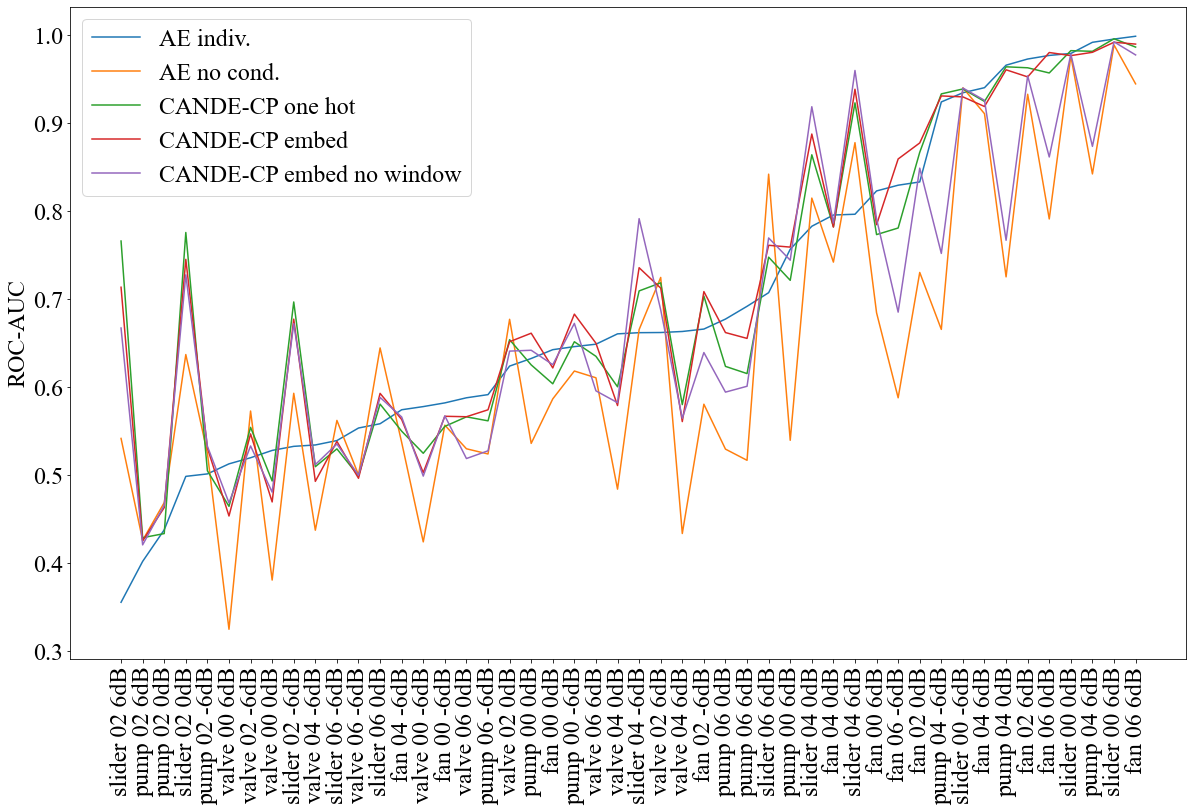

In [35]:
formatted_col_map_plot= {
            "AE_sound": "AE indiv.", 
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE-CP one hot",  
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
           "AE_sound_FiLM_embed_64_no_window": "CANDE-CP embed no window"
}

cols_to_plot = ["AE indiv.", "AE no cond.","CANDE-CP one hot","CANDE-CP embed","CANDE-CP embed no window"]
plt_results = pd.concat([results_df,single_model_results], axis=1).sort_values(by="AE_sound")
plt_results = plt_results.rename(columns=formatted_col_map_plot, errors="raise")
plt_results[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in plt_results.index.tolist()], index=plt_results.index)
plt_results_labels = plt_results["Machine Name"]+' '+plt_results["ID"].astype(str)+" "+plt_results["SNR"]
plt_results_labels = [s.replace('min', '-') for s in plt_results_labels ]
plt_results_ax = plt_results[cols_to_plot].plot(figsize=(20, 12))
plt_results_ax.set_xticks(np.arange(len(plt_results)))
plt_results_ax.set_ylabel("ROC-AUC")
plt_results_ax.tick_params(axis='both', which='major', labelsize=24)
plt_results_ax.set_xticklabels(plt_results_labels, rotation=90)
plt.savefig("figs/CANDE-CP-MIMII-ROC-AUC.png")


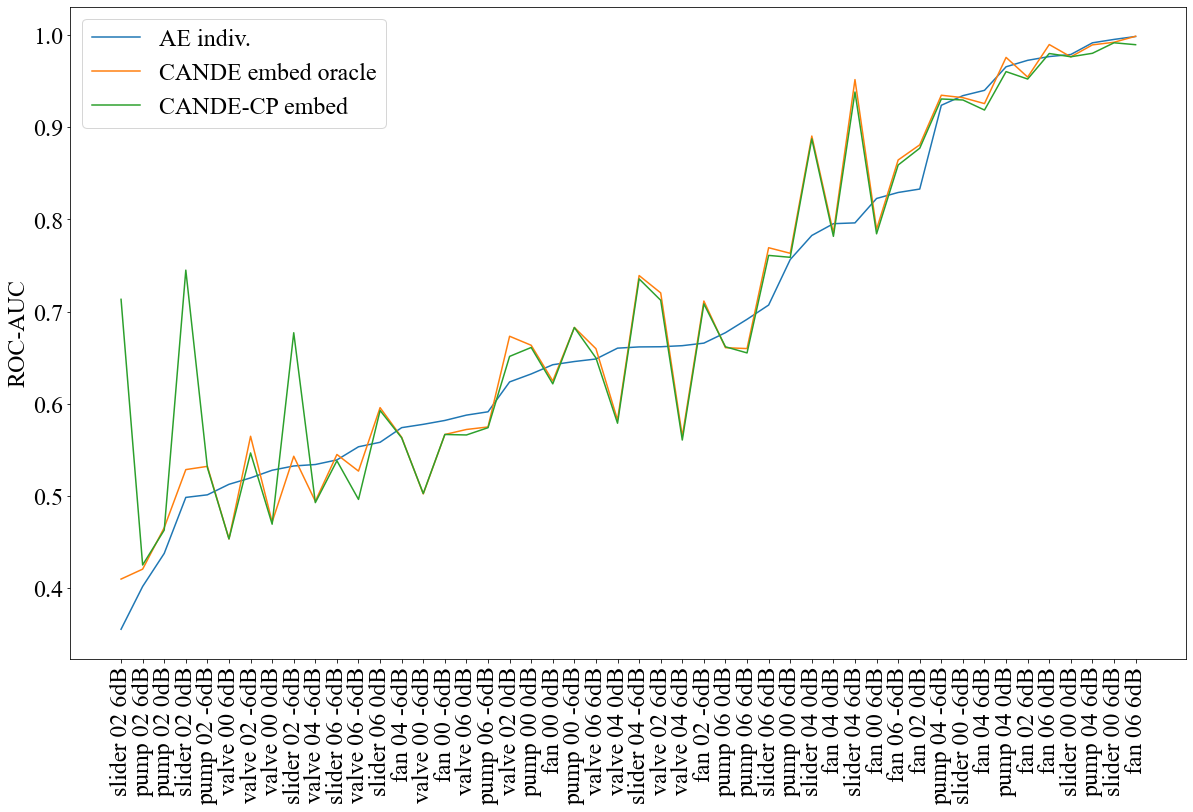

In [38]:
formatted_col_map_oracle_plot= {
           "AE_sound": "AE indiv.", 
           "AE_sound_FiLM_embed_64_oracle": "CANDE embed oracle",
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
}

cols_to_plot_oracle = ["AE indiv.", "CANDE embed oracle","CANDE-CP embed"]
plt_oracle_results_df = oracle_results_df.sort_values(by="AE_sound")
plt_oracle_results_df  = plt_oracle_results_df.rename(columns=formatted_col_map_oracle_plot, errors="raise")
plt_oracle_results_df [["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in plt_oracle_results_df.index.tolist()], index=plt_oracle_results_df.index)
plt_oracle_results_labels = plt_oracle_results_df["Machine Name"]+' '+plt_oracle_results_df["ID"].astype(str)+" "+plt_oracle_results_df["SNR"]
plt_oracle_results_labels = [s.replace('min', '-') for s in plt_oracle_results_labels]
plt_oracle_results_df_ax = plt_oracle_results_df[cols_to_plot_oracle].plot(figsize=(20, 12))
plt_oracle_results_df_ax.set_xticks(np.arange(len(plt_oracle_results_df)))
plt_oracle_results_df_ax.set_ylabel("ROC-AUC")
plt_oracle_results_df_ax.tick_params(axis='both', which='major', labelsize=24)
plt_oracle_results_df_ax.set_xticklabels(plt_results_labels, rotation=90)
plt.savefig("figs/CANDE-CP-oracle-MIMII-ROC-AUC.png")


In [14]:
formatted_col_map= {
           "AE_sound_all": "AE no cond.", 
           "AE_sound_FiLM_one_hot"  :"CANDE-CP one hot",  
           "AE_sound_FiLM_embed_64": "CANDE-CP embed",
           "AE_sound_FiLM_embed_64_no_window": "CANDE-CP embed no window"
}


results_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame([x.split('_') for x in results_df_print.index.tolist()], index=results_df_print.index)

results_df_print["ID"] = pd.to_numeric(results_df_print["id"])
results_df_print["ID"] = results_df_print["ID"].map(inv_machine_id_map)

results_df_print["ID"] = pd.DataFrame([x.split('_')[-1] for x in results_df_print["ID"].tolist()], index=results_df_print.index)
formatted_results_ranks_df_print= pd.concat([results_df_print, mean_rank_row])
formatted_results_ranks_df_print= formatted_results_ranks_df_print.rename(columns=formatted_col_map, errors="raise")

formatted_results_ranks_df_print = formatted_results_ranks_df_print[[
    "Machine Name",
    "ID",
    "SNR",
    "AE no cond.", 
    "CANDE-CP one hot", 
    'CANDE-CP embed no window',
    "CANDE-CP embed"
]]


In [15]:
print(formatted_results_ranks_df_print.to_latex( columns=formatted_results_ranks_df_print.columns, index=False))

\begin{tabular}{lllllll}
\toprule
Machine Name &   ID &     SNR &  AE no cond. & CANDE-CP one hot & CANDE-CP embed no window & CANDE-CP embed \\
\midrule
         fan &   00 &     0dB &  0.587±0.044 &      0.604±0.049 &               0.625±0.04 &    0.622±0.042 \\
         fan &   00 &     6dB &  0.684±0.025 &      0.773±0.054 &              0.791±0.032 &    0.784±0.034 \\
         fan &   00 &  min6dB &  0.557±0.033 &      0.555±0.031 &              0.567±0.029 &    0.567±0.029 \\
         fan &   02 &     0dB &   0.73±0.101 &      0.867±0.036 &              0.849±0.065 &    0.877±0.016 \\
         fan &   02 &     6dB &  0.933±0.031 &      0.963±0.037 &              0.954±0.023 &    0.952±0.026 \\
         fan &   02 &  min6dB &    0.58±0.04 &      0.703±0.032 &              0.639±0.019 &    0.708±0.026 \\
         fan &   04 &     0dB &  0.742±0.015 &      0.782±0.003 &               0.786±0.02 &    0.782±0.045 \\
         fan &   04 &     6dB &  0.911±0.041 &      0.925±0.031 &    

In [16]:
single_model_list_print = []
for i in range(16):
    single_model_list_print.append(get_results_print("AE_sound", context=str(i)))
single_model_results_print = pd.concat(single_model_list_print)
cande_oracle_results_print = get_results_oracle_print("AE_sound_FiLM_embed_64").rename(columns={"AE_sound_FiLM_embed_64": "AE_sound_FiLM_embed_64_oracle"})
oracle_results_df_print = pd.concat([single_model_results_print, cande_oracle_results_print, results_df_print.AE_sound_FiLM_embed_64], axis=1)


oracle_results_df_print[["Machine Name", "id", "SNR"]] = pd.DataFrame(
    [x.split('_') for x in oracle_results_df_print.index.tolist()], 
    index=oracle_results_df_print.index
)

oracle_results_df_print["ID"] = pd.to_numeric(oracle_results_df_print["id"])
oracle_results_df_print["ID"] = oracle_results_df_print["ID"].map(inv_machine_id_map)

oracle_results_df_print["ID"] = pd.DataFrame(
    [x.split('_')[-1] for x in oracle_results_df_print["ID"].tolist()], 
    index=oracle_results_df_print.index
)


formatted_results_oracle_df_print= oracle_results_df_print.rename(columns=formatted_col_map_oracle_plot, errors="raise")
formatted_results_oracle_df_print

mean               AE_sound
fan_0_0dB        0.642
fan_0_6dB        0.823
fan_0_min6dB     0.582
std               AE_sound
fan_0_0dB        0.012
fan_0_6dB        0.007
fan_0_min6dB     0.009
se               AE_sound
fan_0_0dB     0.007176
fan_0_6dB     0.004073
fan_0_min6dB  0.004977
ci (array([[0.6111248 ],
       [0.80547672],
       [0.56058719]]), array([[0.6728752 ],
       [0.84052328],
       [0.60341281]]))
                         AE_sound
fan_0_0dB     0.642 (0.611-0.673)
fan_0_6dB     0.823 (0.805-0.841)
fan_0_min6dB  0.582 (0.561-0.603)
mean               AE_sound
fan_1_0dB        0.833
fan_1_6dB        0.973
fan_1_min6dB     0.666
std               AE_sound
fan_1_0dB        0.052
fan_1_6dB        0.004
fan_1_min6dB     0.023
se               AE_sound
fan_1_0dB     0.029844
fan_1_6dB     0.002590
fan_1_min6dB  0.013043
ci (array([[0.70459003],
       [0.96185793],
       [0.60988067]]), array([[0.96140997],
       [0.98414207],
       [0.72211933]]))
                    

,AE indiv.,CANDE embed oracle,CANDE-CP embed,Machine Name,id,SNR,ID
fan_0_0dB,0.642±0.031,0.625±0.043,0.622±0.042,fan,0,0dB,00
fan_0_6dB,0.823±0.018,0.789±0.034,0.784±0.034,fan,0,6dB,00
fan_0_min6dB,0.582±0.021,0.567±0.03,0.567±0.029,fan,0,min6dB,00
fan_1_0dB,0.833±0.128,0.881±0.017,0.877±0.016,fan,1,0dB,02
fan_1_6dB,0.973±0.011,0.954±0.026,0.952±0.026,fan,1,6dB,02
fan_1_min6dB,0.666±0.056,0.712±0.027,0.708±0.026,fan,1,min6dB,02
fan_2_0dB,0.795±0.014,0.785±0.046,0.782±0.045,fan,2,0dB,04
fan_2_6dB,0.94±0.007,0.926±0.025,0.919±0.025,fan,2,6dB,04
fan_2_min6dB,0.574±0.008,0.564±0.035,0.563±0.034,fan,2,min6dB,04
fan_3_0dB,0.977±0.004,0.99±0.015,0.98±0.019,fan,3,0dB,06


In [17]:
print(formatted_results_oracle_df_print[["Machine Name", "ID", "SNR", "AE indiv.", "CANDE embed oracle","CANDE-CP embed"]].to_latex(  index=False))

\begin{tabular}{llllll}
\toprule
Machine Name &  ID &     SNR &    AE indiv. & CANDE embed oracle & CANDE-CP embed \\
\midrule
         fan &  00 &     0dB &  0.642±0.031 &        0.625±0.043 &    0.622±0.042 \\
         fan &  00 &     6dB &  0.823±0.018 &        0.789±0.034 &    0.784±0.034 \\
         fan &  00 &  min6dB &  0.582±0.021 &         0.567±0.03 &    0.567±0.029 \\
         fan &  02 &     0dB &  0.833±0.128 &        0.881±0.017 &    0.877±0.016 \\
         fan &  02 &     6dB &  0.973±0.011 &        0.954±0.026 &    0.952±0.026 \\
         fan &  02 &  min6dB &  0.666±0.056 &        0.712±0.027 &    0.708±0.026 \\
         fan &  04 &     0dB &  0.795±0.014 &        0.785±0.046 &    0.782±0.045 \\
         fan &  04 &     6dB &   0.94±0.007 &        0.926±0.025 &    0.919±0.025 \\
         fan &  04 &  min6dB &  0.574±0.008 &        0.564±0.035 &    0.563±0.034 \\
         fan &  06 &     0dB &  0.977±0.004 &         0.99±0.015 &     0.98±0.019 \\
         fan &  06 &   